<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Scaling_encoding_melb_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise: Data Preparation (Scaling and Encoding)**

In this exercise, we will use some of the methods:

- Encoding
- Scaling

**Use melb_data.csv (Melbourne House Data) with:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Perform these steps in preprocessing and modeling:**
- Perform simple EDA to explore the dataset.
- Split the dataset 80:20 with random_state = 2020
- Use ColumnTransformer for encoding.
- There are 5 categorical features. Encode the features according to their characteristics.
- Scale the numerical features. Choose the scaler that best suits your data characteristics.
- Fit the model and evaluate it using the Linear Regression method on the preprocessed data.

### **Initial Setup**

In [1]:
# Installing additional library
!pip install category_encoders # Category encoder

In [2]:
# Importing libraries

# data wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# column transformer # unites several preprocessing stages at once
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# evaluation
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# gg plot style
plt.style.use('ggplot')


### **Business Understanding**

**Context**

Melbourne, as one of Australia's largest and most diverse cities, has a dynamic and rapidly growing housing market. The availability of public amenities, accessibility to transportation, cultural diversity, and regional economic conditions are some of the factors that influence housing prices in Melbourne. As population growth and urbanization continue, an accurate understanding of housing price trends is becoming increasingly important for buyers, sellers, and other stakeholders in the property industry.

**Problem Statement**

While many factors influence housing prices in Melbourne, predicting housing prices accurately remains a challenge. Complex variations in factors such as location and property size complicate housing price prediction.

Therefore, the challenge is to develop a predictive model that can accurately estimate housing prices in Melbourne based on a variety of relevant factors, ensuring that the offered house price is neither too high, thus reducing demand, nor too low, which would reduce profits.

**Goals**

Determining the right price for a house based on its characteristics.

**Analytic Approach**

So, what we need to do is analyze the data to find patterns in the existing features that differentiate one house from another.

Next, we will build a regression model that will help companies provide house price prediction tools, which will be useful for ensuring prices are transparent and reliable.

**Metric Evaluation**

The evaluation metrics used are MSE and RMSE. The smaller the values ​​for both, the more accurate the model is in predicting house prices, given the limitations of the features used.

Furthermore, we can also calculate the R-squared or adj. R-squared value to determine how well the model represents the overall variance of the data. The closer it is to 1, the better the model fits the observed data. However, this metric is not valid for non-linear models.

### **Data Understanding**

- Dataset [source](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)
- The dataset depicts 13,580 real estate listings in Melbourne, sourced from Domain.com.au.
- Each row represents information/characteristics of the property for sale and its price.

In [4]:
# Load dataset
melb_data = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/melb_data.csv'
file = pd.read_csv(melb_data)
data = file[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Price']].copy()
print(f'Number of rows and columns {data.shape}')

data.head()

Number of rows and columns (13580, 14)


,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,1480000.0
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,1035000.0
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,1465000.0
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,850000.0
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,1600000.0


**Attribute Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
|Suburb |Text | Suburb area |
|Rooms |Integer | Number of rooms |
|Type |Text | h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site|
|Method |Text | S - property sold; SP - property sold prior; PI - property passed in; VB - vendor bid; SA - sold after auction.|
|Distance |Float | Distance from CBD |
|Bedroom2 |Float | Number of bedrooms |
|Bathroom |Float | Number of bathrooms |
|Car |Float | Number of carspots |
|Landsize |Float | Land Size |
|BuildingArea |Float | Building Size |
|YearBuilt |Float | Year Built |
|CouncilArea |Text | Governing council for the area |
|Regionname |Text | General Region (West, North West, North, North east …etc) |
|Price |Float | Price in dollars |

In [5]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Type          13580 non-null  object 
 3   Method        13580 non-null  object 
 4   Distance      13580 non-null  float64
 5   Bedroom2      13580 non-null  float64
 6   Bathroom      13580 non-null  float64
 7   Car           13518 non-null  float64
 8   Landsize      13580 non-null  float64
 9   BuildingArea  7130 non-null   float64
 10  YearBuilt     8205 non-null   float64
 11  CouncilArea   12211 non-null  object 
 12  Regionname    13580 non-null  object 
 13  Price         13580 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


**Initial Assesment**

In [6]:
# Check data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Suburb,object,0.000000,False,314,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Rooms,int64,0.000000,False,9,"[2, 3, 4, 1, 6, 5, 8, 7, 10]"
2,Type,object,0.000000,False,3,"[h, u, t]"
3,Method,object,0.000000,False,5,"[S, SP, PI, VB, SA]"
4,Distance,float64,0.000000,False,202,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
5,Bedroom2,float64,0.000000,False,12,"[2.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 8.0, 9.0, ..."
6,Bathroom,float64,0.000000,False,9,"[1.0, 2.0, 3.0, 4.0, 0.0, 7.0, 5.0, 6.0, 8.0]"
7,Car,float64,0.456554,False,11,"[1.0, 0.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0, 7.0, ..."
8,Landsize,float64,0.000000,False,1448,"[202.0, 156.0, 134.0, 94.0, 120.0, 181.0, 245...."
9,BuildingArea,float64,47.496318,False,602,"[nan, 79.0, 150.0, 142.0, 210.0, 107.0, 75.0, ..."


**Descriptive statistics**

In [7]:
# Descriptive statistics
display(data.describe(), data.describe(include='object'))

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


,Suburb,Type,Method,CouncilArea,Regionname
count,13580,13580,13580,12211,13580
unique,314,3,5,33,8
top,Reservoir,h,S,Moreland,Southern Metropolitan
freq,359,9449,9022,1163,4695


There is an anomaly where the building area is 0 m2.

### **Exploratory Data Analysis (EDA)**

#### `Numerical Features`

**Data Distribution**

In [8]:
numerical = [var for var in data.drop(columns=['Price']).columns if data[var].dtypes != 'object']

In [9]:
# Normality test
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Rooms,490.010610,3.940471e-107,Not Normally Distributed
1,Distance,4806.840514,0.000000e+00,Not Normally Distributed
2,Bedroom2,3161.383246,0.000000e+00,Not Normally Distributed
3,Bathroom,3666.422041,0.000000e+00,Not Normally Distributed
4,Car,4031.178915,0.000000e+00,Not Normally Distributed
5,Landsize,53168.457055,0.000000e+00,Not Normally Distributed
6,BuildingArea,26176.199306,0.000000e+00,Not Normally Distributed
7,YearBuilt,3828.531583,0.000000e+00,Not Normally Distributed


All columns are not normally distributed.

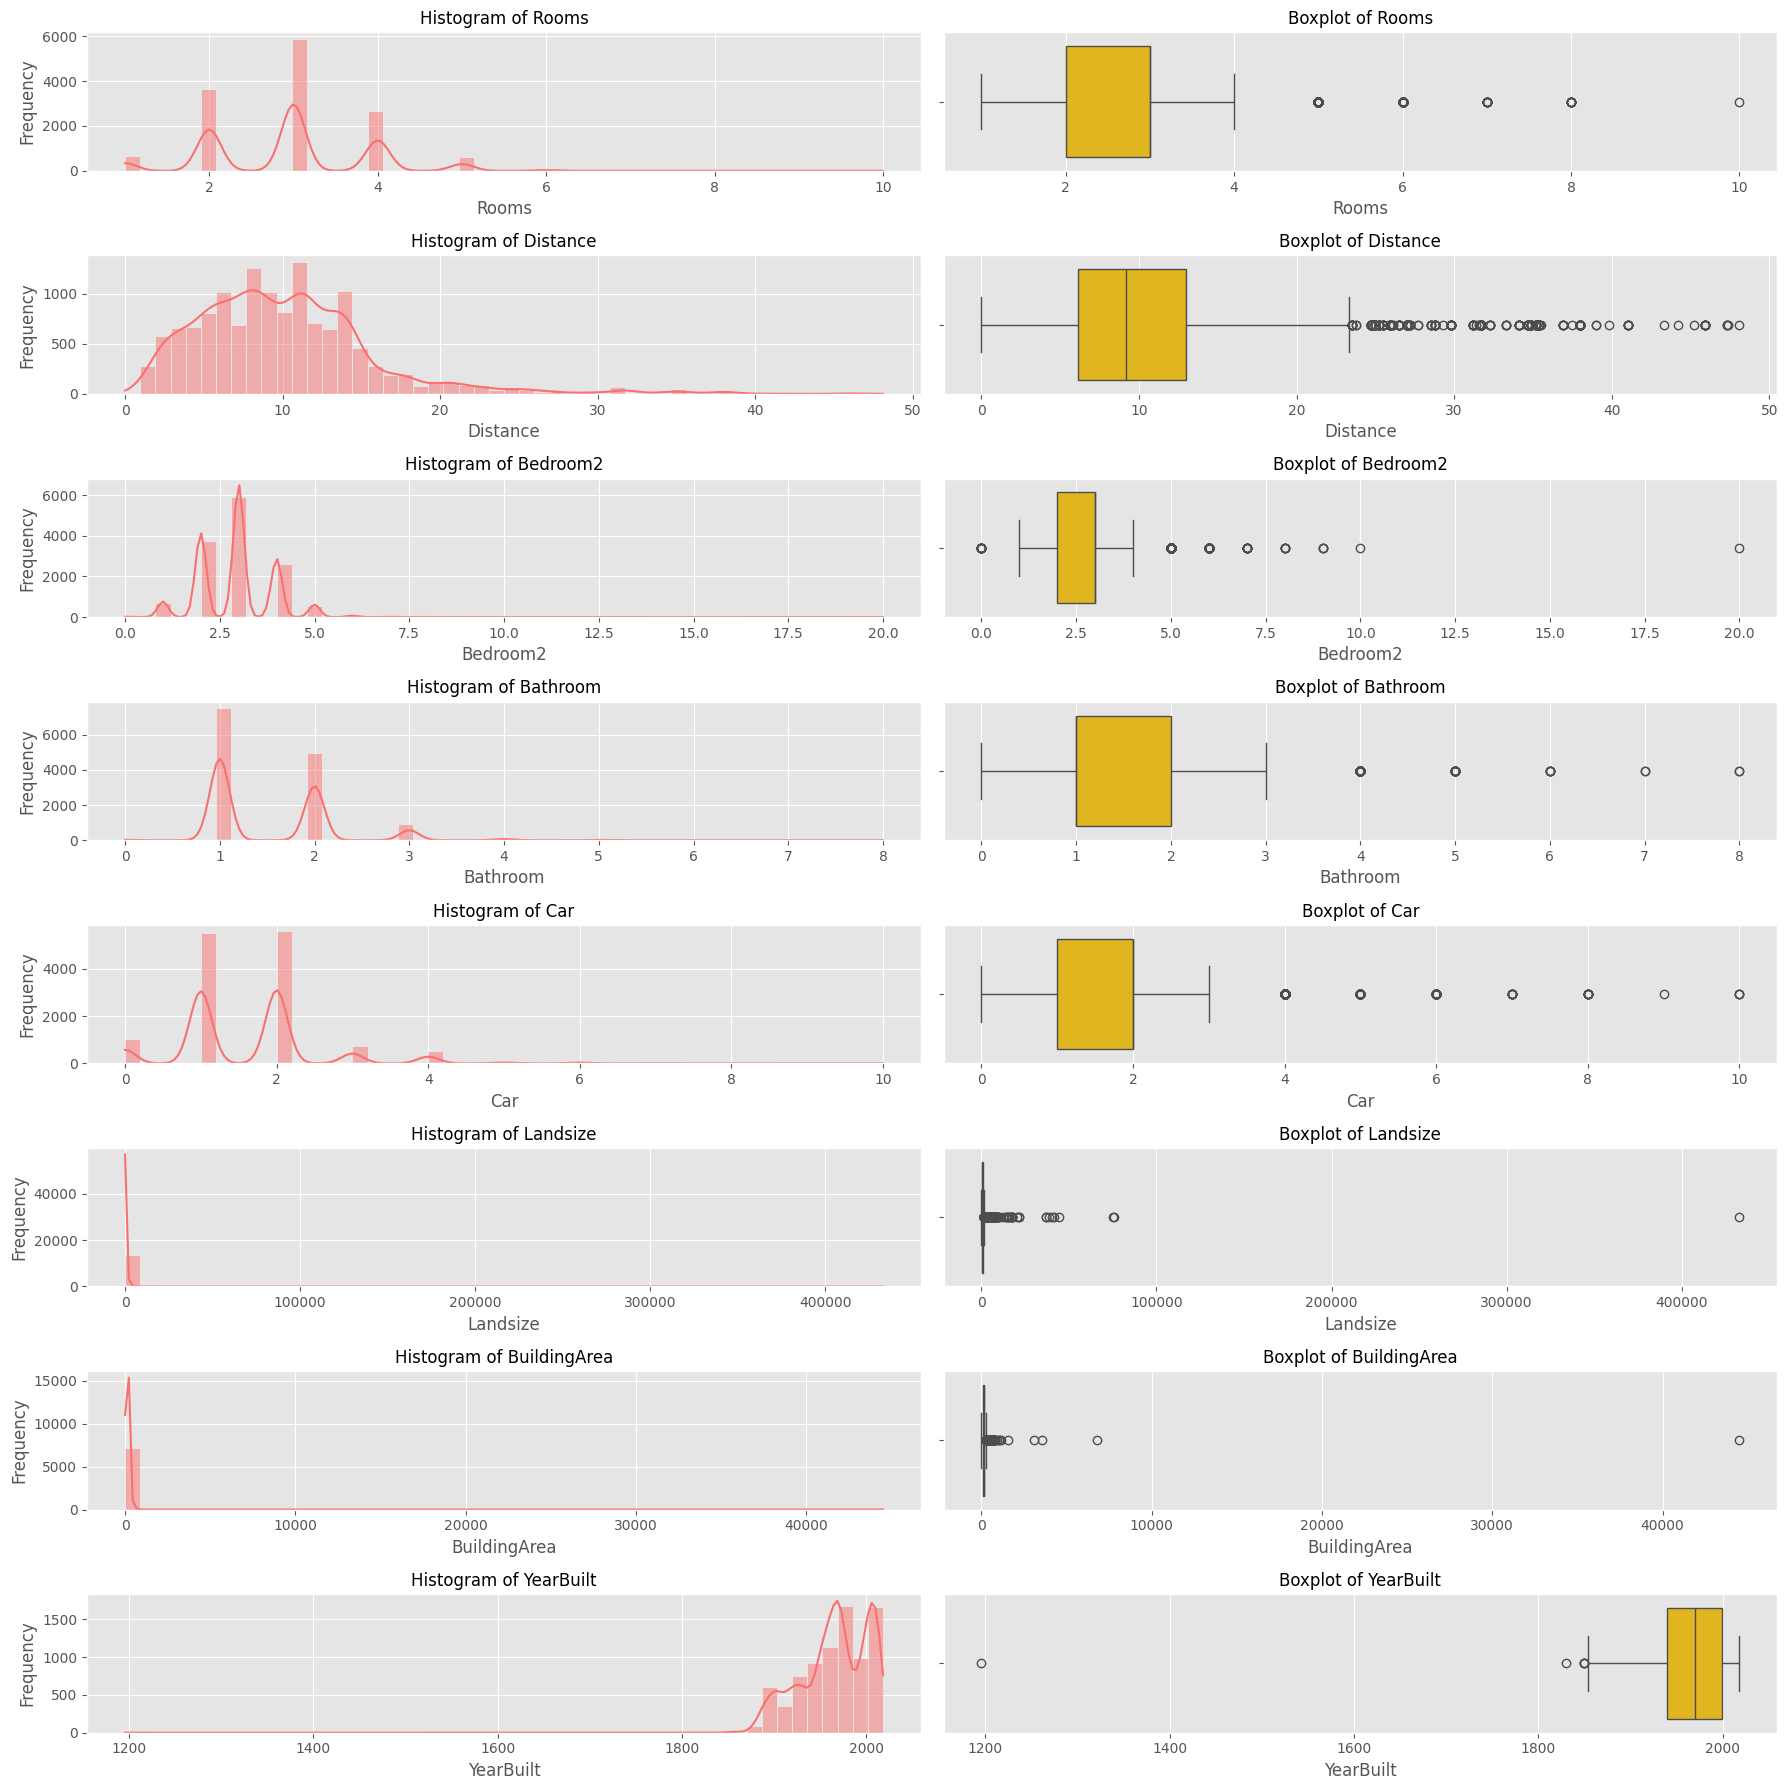

In [10]:
# EDA: data distribution
# Histogram and boxplot
plt.figure(figsize=(18, 18))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Correlation**

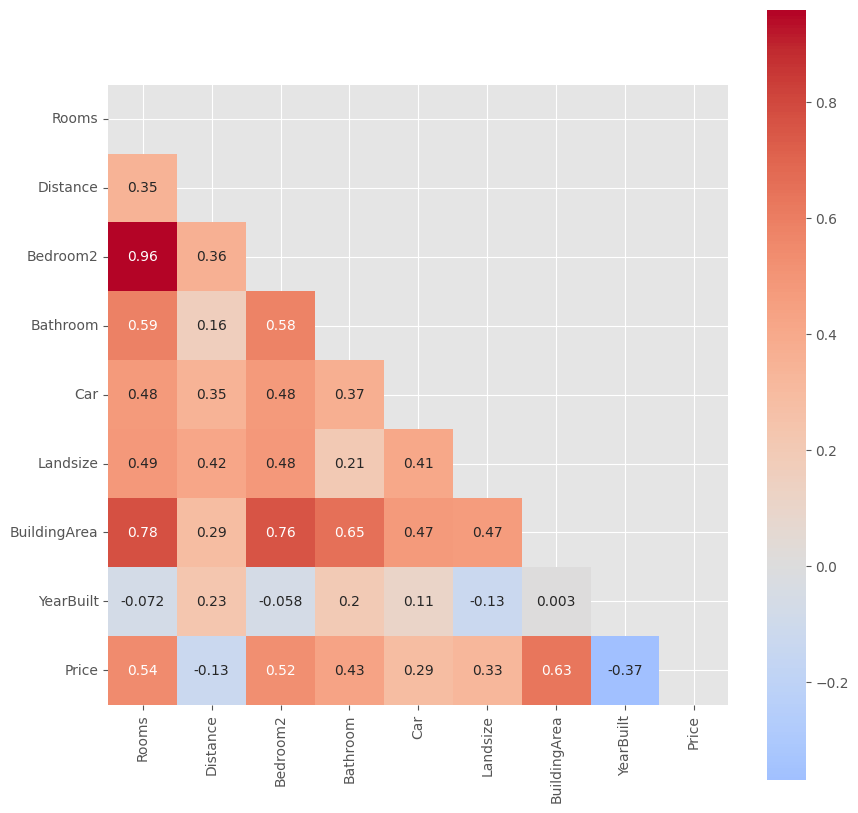

In [11]:
# Correlation test
plt.figure(figsize=(10,10))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

matrix = np.triu(numerical_data.corr(method='spearman')) # Spearman correlation test for not normally distributed

sns.heatmap(data=numerical_data.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Feature vs Target**

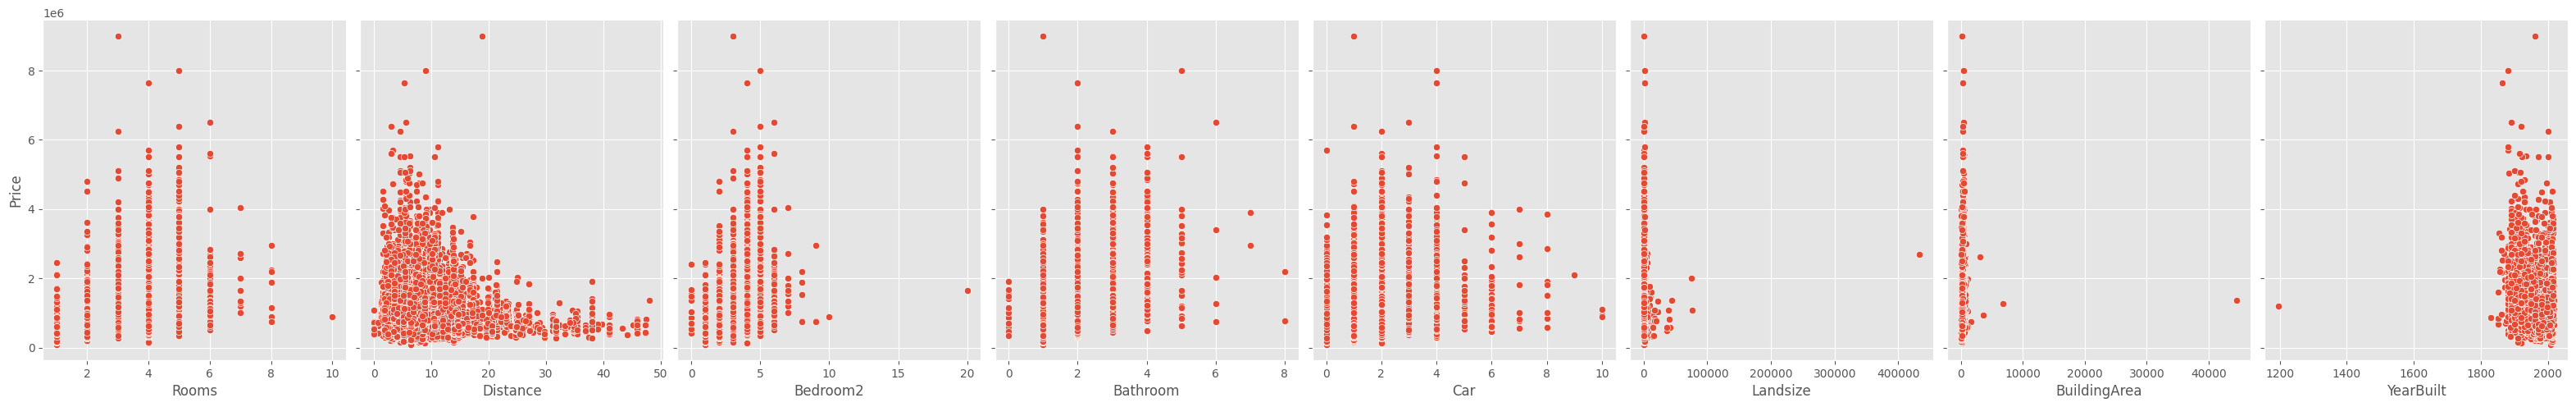

In [12]:
# Features vs target
sns.pairplot(data, x_vars=numerical, y_vars='Price', height=5, aspect=0.8)
plt.show()

#### `Categorical Features`

**Distribution**

In [13]:
categorical = [var for var in data.drop(columns=['Suburb']).columns if data[var].dtypes == 'object']

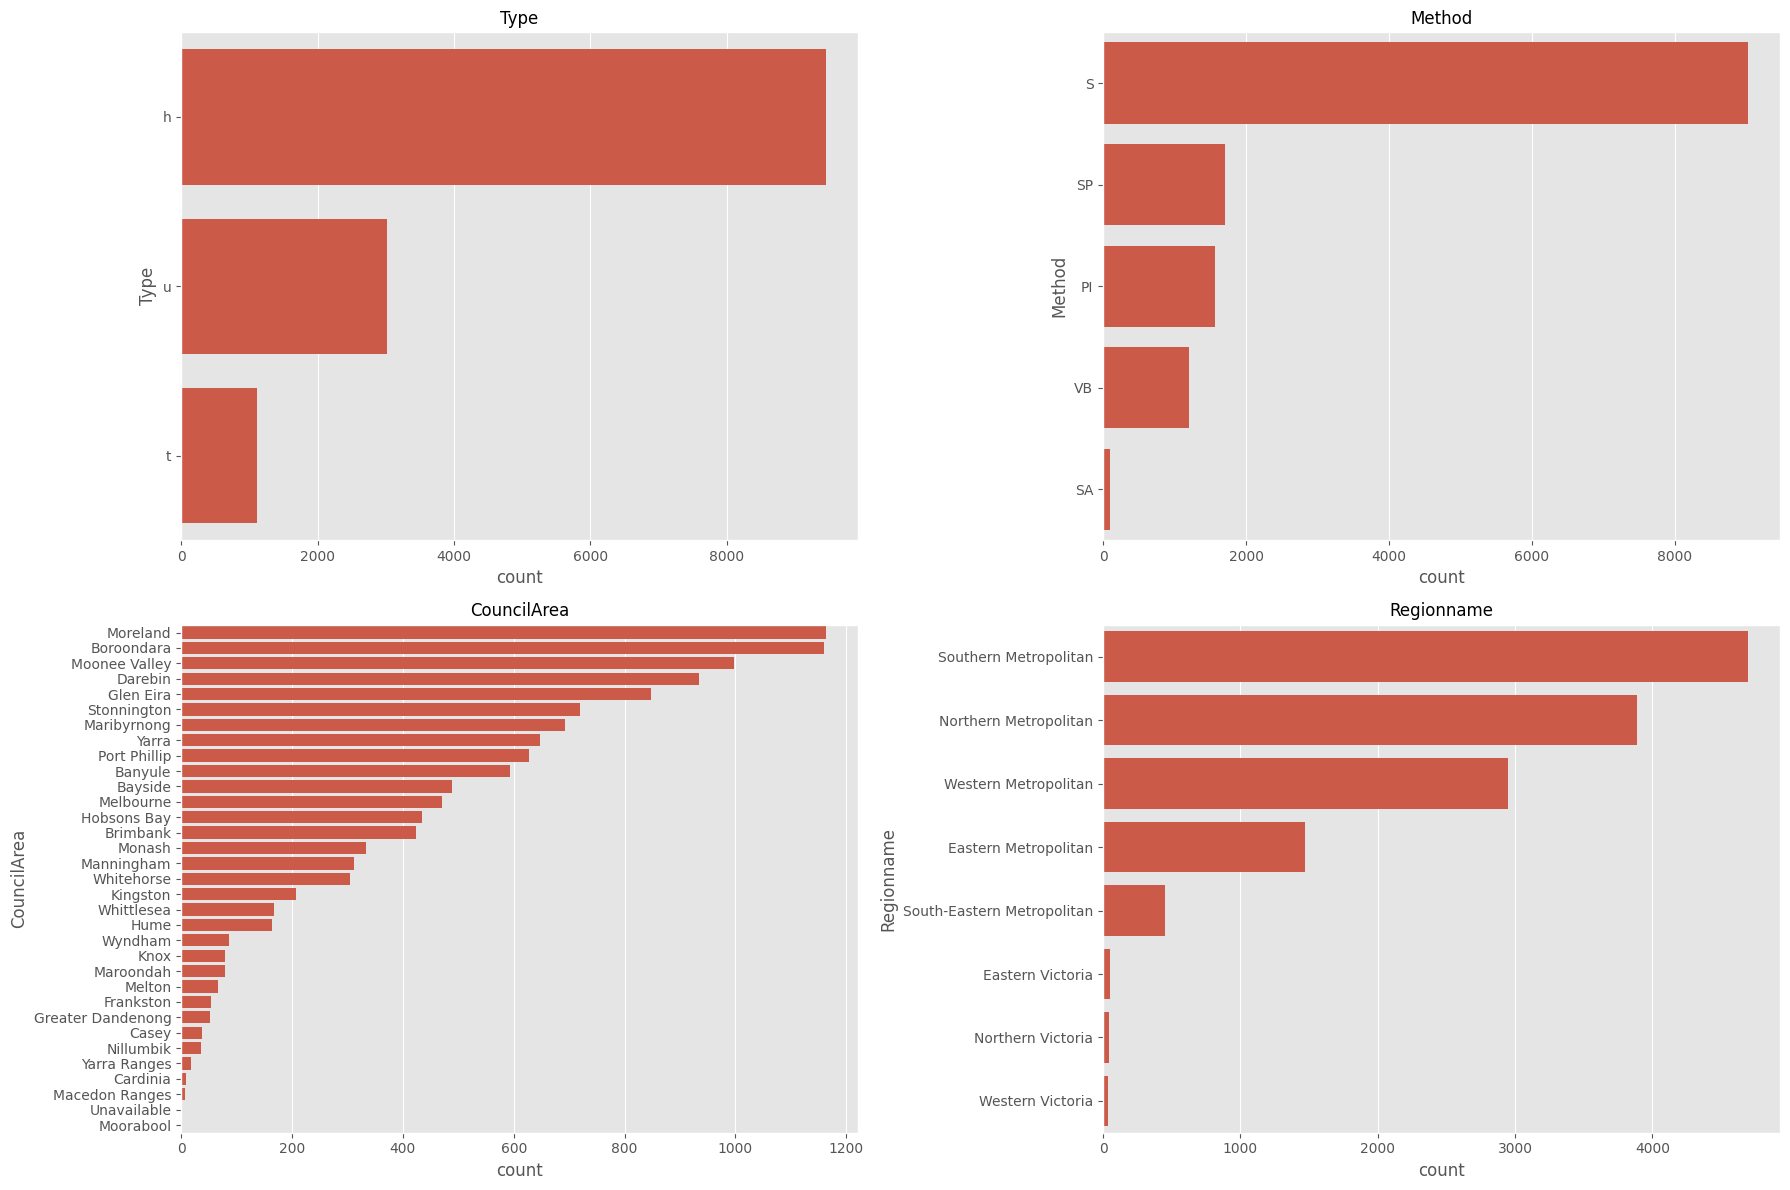

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12)

plt.tight_layout()
plt.show()

**Feature vs Target**

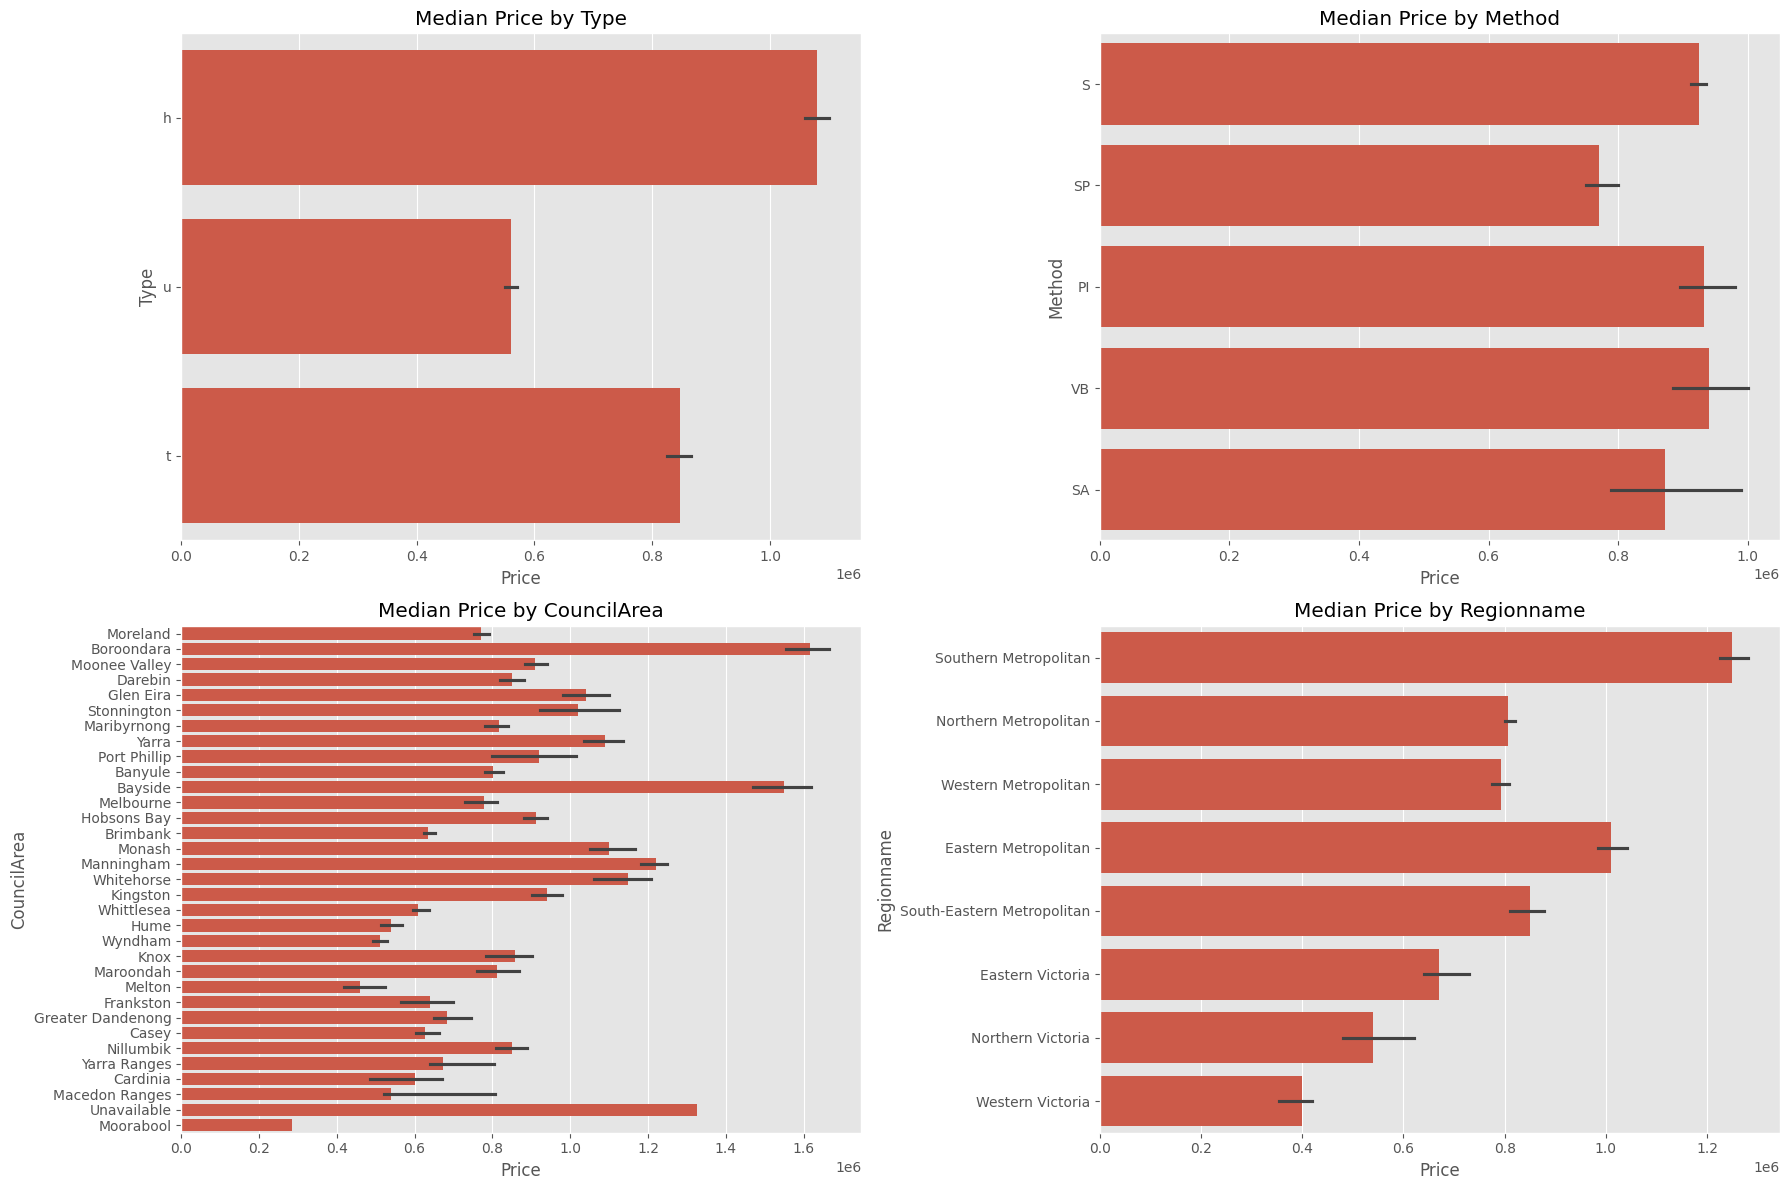

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

for col, j in zip(categorical, axes.flatten()):
    ax = sns.barplot(data=data, y= col, x='Price', estimator=np.median, ax= j, order=data[col].value_counts().index)
    ax.set_title(f'Median Price by {col}')

plt.tight_layout()
plt.show()

#### `Bivariate Analysis`

In [16]:
def create_bar(x, y, col):
    sns.barplot(data=data, x=x, y=y, ci=0, estimator=np.median)
    plt.title(f'Median Building Area by {col}')
    plt.show()

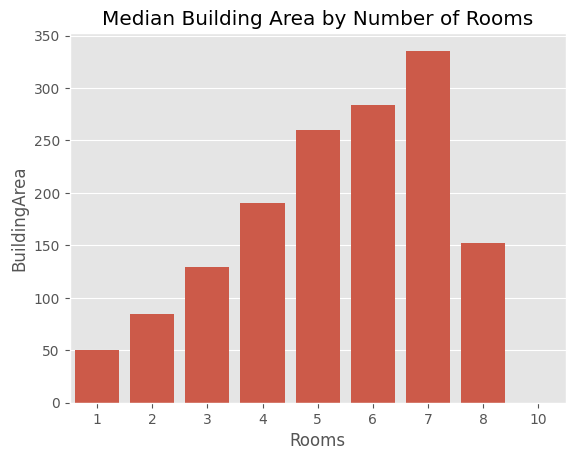

In [17]:
create_bar('Rooms', 'BuildingArea', 'Number of Rooms')

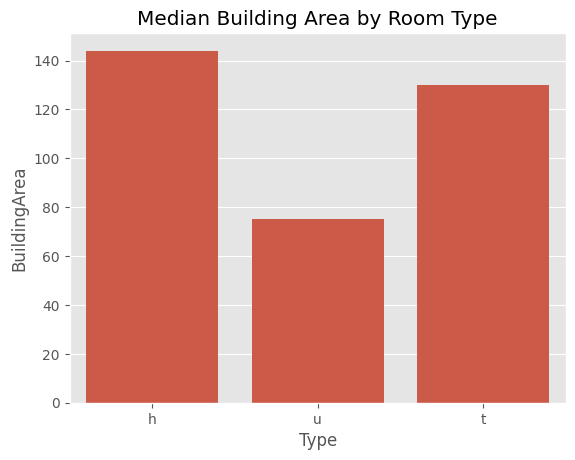

In [18]:
create_bar('Type', 'BuildingArea', 'Room Type')

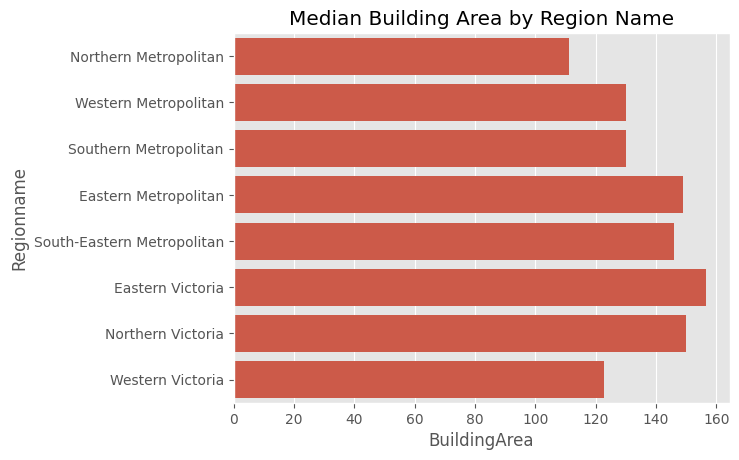

In [19]:
create_bar('BuildingArea', 'Regionname', 'Region Name')

### **Data Preprocessing**

#### `Duplicates`

In [20]:
print(f"Number of duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of {len(data[data.duplicated()])/len(data)*100:.2f}%')

Number of duplicated data: (20, 14)
Percentage of 0.15%


Handling duplicated data:

In [21]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

#### `Missing Values`

In [22]:
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
Suburb,0
Rooms,0
Type,0
Method,0
Distance,0
Bedroom2,0
Bathroom,0
Car,62
Landsize,0
BuildingArea,6445


**CouncilArea**

In [23]:
data['CouncilArea'] = data['CouncilArea'].fillna("Unknown")
data.isna().sum()[data.isna().sum()>0].to_frame('missing values')

,missing values
Car,62
BuildingArea,6445
YearBuilt,5371


**Car**

In [24]:
data['Car'] = data['Car'].fillna(data['Car'].median())
data.isna().sum()[data.isna().sum()>0].to_frame('missing values')

,missing values
BuildingArea,6445
YearBuilt,5371


**Building area**

In [25]:
data['BuildingArea'] = data['BuildingArea'].fillna(data.groupby(['Regionname', 'Type', 'Rooms'])['BuildingArea'].transform('median'))
data.isna().sum()[data.isna().sum()>0].to_frame('missing values')

,missing values
BuildingArea,11
YearBuilt,5371


**YearBuilt**

In [26]:
data['YearBuilt'] = data['YearBuilt'].fillna(data.groupby(['Regionname', 'Type', 'Rooms'])['YearBuilt'].transform('median'))
data.isna().sum()[data.isna().sum()>0].to_frame('missing values')

,missing values
BuildingArea,11
YearBuilt,3


**Drop remaining**

In [27]:
data = data.dropna()
data.isna().sum()[data.isna().sum()>0].to_frame('missing values')

,missing values


#### `Outliers`

In [28]:
# Calculating outliers
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Rooms,678,5.00,0.50,4.50
1,Distance,407,3.00,-4.25,23.35
2,Bedroom2,652,4.81,0.50,4.50
3,Bathroom,143,1.06,-0.50,3.50
4,Car,642,4.74,-0.50,3.50
5,Landsize,367,2.71,-534.00,1362.00
6,BuildingArea,624,4.61,-10.00,270.00
7,YearBuilt,359,2.65,1892.50,2040.50


In [29]:
data.shape

(13549, 14)

In [30]:
# Outlier removals
for i, row in outlier_df.iterrows():
    data = data[(data[row['Column']] >= row['Lower Bound']) & (data[row['Column']] <= row['Upper Bound'])]

In [31]:
data.shape

(11034, 14)

#### `Collinearity`

In [32]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data, i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

We will carry out repeated testing until we obtain a VIF value < 10.

In [35]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [36]:
vif_df

,Feature,VIF
2,Car,6.118136
0,Distance,5.817819
1,Bathroom,5.419442
3,Landsize,3.654291


In [37]:
dropped_columns

['Rooms', 'Bedroom2', 'BuildingArea', 'YearBuilt']

#### `Cardinality`

In [38]:
categorical = [var for var in data.columns if data[var].dtypes == 'object']

In [39]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of Suburb: 248
Cardinality of Type: 3
Cardinality of Method: 5
Cardinality of CouncilArea: 28
Cardinality of Regionname: 6


#### `Feature Engineering`

Now let's encode the categorical features we have.

We will do the following:

1. Convert the `Type` feature/column using One Hot Encoding, as this feature is unordered/non-ordinal, and its unique data is small.
2. Convert the `Method` feature/column using One Hot Encoding, as this feature is unordered/non-ordinal, and its unique data is small.
3. Convert the `Regionname` feature/column using One Hot Encoding, as this feature is unordered/non-ordinal, and its unique data is small.
4. Convert the `CouncilArea` feature/column using Binary Encoding, as this feature is unordered/non-ordinal, but its unique data is large.
5. Change the `Suburb` feature/column using Binary Encoding, because this feature has no order/is not ordinal, but the number of unique data is large.

In [40]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Type','Method','Regionname']),
    ('binary', BinaryEncoder(), ['Suburb','CouncilArea']),
], remainder='passthrough')

**Scaling**

We will use the Robust Scaler because our data contains outliers, and the Robust Scaler will not be affected by outliers. We can reset the scaler later to find the best scaler.

In [41]:
scaler = RobustScaler()

### **Modeling**

#### **Defining Features and Target**

In [42]:
# Define Features (X) and Target (y)
# feature
X = data.drop(columns='Price')

# target
y = data['Price']

#### **Data Splitting**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

**Preprocessing**

`Encoding`

In [44]:
# .fit and .transform method
X_train_encod = transformer.fit_transform(X_train)

# .transform method
X_test_encod = transformer.transform(X_test)

`Scaling`

In [45]:
# .fit and .transform method
X_train_encod_scaled = scaler.fit_transform(X_train_encod)

# .transform method
X_test_encod_scaled = scaler.transform(X_test_encod)

`Get Col Names`

In [46]:
# Get OneHotEncoder feature names (safe for new and old sklearn)
ohe_features = transformer.named_transformers_['onehot'].get_feature_names_out(['Type','Method','Regionname'])

# Get BinaryEncoder feature names (category_encoders still uses .get_feature_names())
binary_features = transformer.named_transformers_['binary'].get_feature_names()

# Get passthrough column names
passthrough_features = X.columns[transformer.transformers_[-1][-1]].tolist()

# Combine everything
col_names = list(ohe_features) + list(binary_features) + passthrough_features


In [47]:
X_train_prep = pd.DataFrame(data=X_train_encod_scaled, columns=col_names)
X_train_prep.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,-0.015385,1.0,2.0,1.0,0.894220,0.729167,-0.266667
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-0.230769,1.0,1.0,-1.0,0.091603,0.750000,0.800000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.153846,1.0,1.0,1.0,0.756816,1.500000,0.266667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,-1.0,1.0,2.123077,1.0,1.0,1.0,1.162486,2.145833,0.266667
4,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,-0.830769,-2.0,0.0,0.0,-0.756816,-1.229167,1.253333


In [48]:
X_test_prep = pd.DataFrame(data=X_test_encod_scaled, columns=col_names)
X_test_prep.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-0.446154,-1.0,0.0,1.0,-0.756816,-0.937500,0.266667
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.569231,1.0,1.0,2.0,-0.292257,0.708333,0.266667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-0.707692,-1.0,1.0,1.0,-0.028353,-0.520833,-0.800000
3,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,-0.476923,-1.0,0.0,0.0,0.612868,-0.937500,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,-0.907692,-1.0,0.0,-1.0,-0.495093,-0.833333,-1.600000


#### **Training and Testing set**

In [49]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [50]:
# define model
multipleLR = sm.OLS(y_train.reset_index(drop=True), sm.add_constant(X_train_prep))

# fitting
multipleLR_result = multipleLR.fit()

**Prediction on the test set using multiple linear regression**

### **Model Evaluation**

#### `MSE, RMSE, R-squared, Adj. R-Squared`

In [51]:
y_pred = multipleLR_result.predict(sm.add_constant(X_test_prep))

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')

MSE: 102163505826.34909
RMSE: 319630.2642528537


**Interpretation**

In [52]:
print(multipleLR_result.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     489.4
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:34:32   Log-Likelihood:            -1.2434e+05
No. Observations:                8827   AIC:                         2.487e+05
Df Residuals:                    8794   BIC:                         2.490e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         


In [53]:
print(multipleLR_result.summary().tables[1])

                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  9.437e+05   2.41e+04     39.146      0.000    8.96e+05    9.91e+05
Type_h                                 1.073e+05   7794.898     13.769      0.000    9.21e+04    1.23e+05
Type_t                                 3.236e+04   8637.381      3.747      0.000    1.54e+04    4.93e+04
Type_u                                -1.397e+05   7482.613    -18.669      0.000   -1.54e+05   -1.25e+05
Method_PI                              -4.23e+04    1.2e+04     -3.515      0.000   -6.59e+04   -1.87e+04
Method_S                               4.885e+04   9610.122      5.083      0.000       3e+04    6.77e+04
Method_SA                              9551.5305   3.32e+04      0.288      0.773   -5.55e+04    7.46e+04
Method_SP                               1.55e+

In [54]:
print(multipleLR_result.summary().tables[2])

Omnibus:                     7578.131   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123696.706
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      57.837   Cond. No.                     1.16e+16


In [55]:
name = ['Lagrange Multiplier Statistic', 'P-value']
test = sm.stats.het_breuschpagan(multipleLR_result.resid, multipleLR_result.model.exog)

list(zip(name, test))

[('Lagrange Multiplier Statistic', np.float64(182.23240672985207)),
 ('P-value', np.float64(8.221088131311245e-22))]

R-Squared:
- 64% of the variance can be explained by features included in the model. The remaining 36% can be explained by other features/variables not included in the model.

F-test (Simultaneous test):
- Prob (F-statistic) / p-value = 0 < 0.05. Reject Ho. There is at least one feature that significantly influences price, but we don't know which one.

#### `Feature Importance`

In [56]:
df_result = pd.DataFrame({
    'coef': multipleLR_result.params
}).reset_index().sort_values('coef')

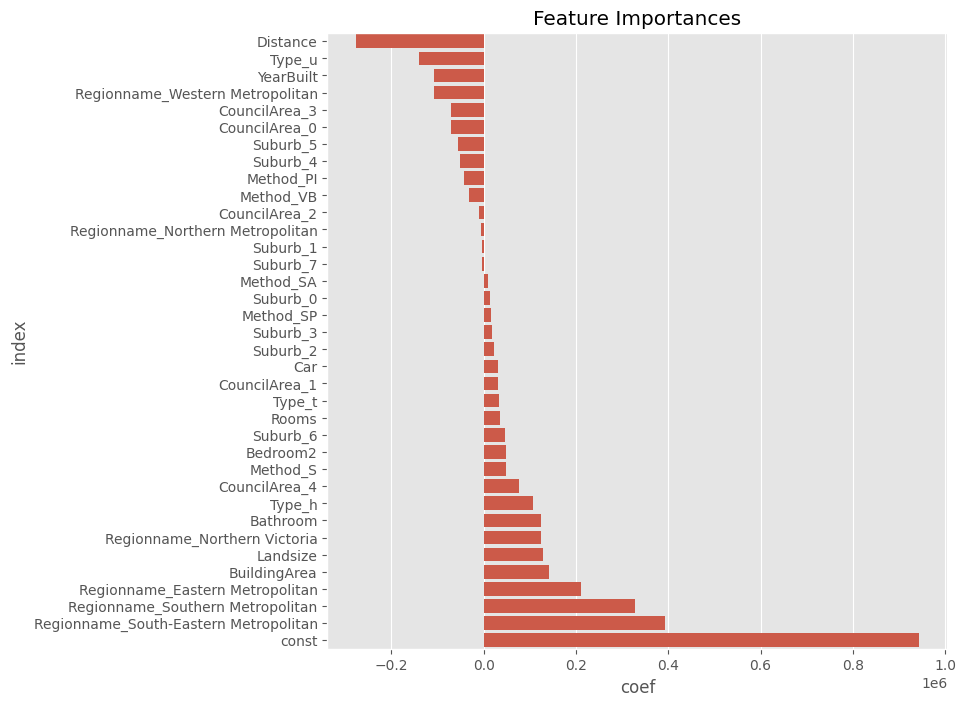

In [57]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_result, y='index', x='coef')
plt.title('Feature Importances')
plt.show()

**Important features for our model**

Positive slope:
- Regionname_South Eastern, Southern, and Eastern Metropolitan (Houses in these areas tend to be more expensive than in other regions)
- Building Area (the larger the building exterior, the more expensive the house)
- Landsize (the larger the land area, the more expensive the house)

Negative slope:
- Distance (the closer the distance to the city, the more expensive the house)
- Type_u (unit house type) (Houses in these areas tend to be cheaper than other house types)
- Year Built (the older the house, the more expensive it is)

`Residual:`

In [58]:
multipleLR_result.resid.mean()

np.float64(-8.151578352191217e-10)

#### `Residual plot`

Text(0, 0.5, 'Residuals')

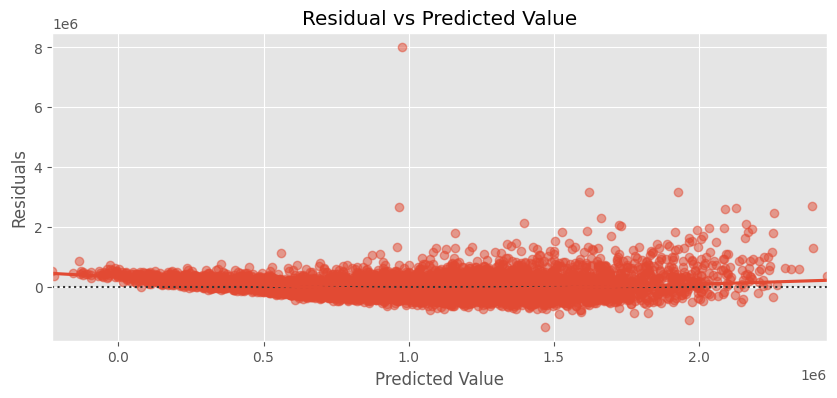

In [59]:
plt.figure(figsize=(10,4))

plot = sns.residplot(
    x=multipleLR_result.fittedvalues,                  # y_pred
    y=y_train,
    lowess=True,                                        # adds lines
    scatter_kws={'alpha':0.5}                           # set transparency
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')



- **Residual Mean**: -8.151e-10 (Close to 0)
- **Prob(JB) < 0.05**: Normally distributed
- **Durbin-Watson ~= 2**: Uncorrelated
- **Prop(BP-test) < 0.05**: Heteroscedasticity

In [60]:
X_train.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000
mean,2.774669,9.506786,2.756203,1.432876,1.449077,379.984140,123.464726,1964.597202
std,0.808045,4.513946,0.803301,0.575087,0.712443,281.858048,46.086283,29.002406
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1893.000000
25%,2.000000,6.100000,2.000000,1.000000,1.000000,148.500000,93.000000,1948.000000
50%,3.000000,9.200000,3.000000,1.000000,1.000000,347.000000,122.000000,1960.000000
75%,3.000000,12.600000,3.000000,2.000000,2.000000,607.000000,141.000000,1985.500000
max,4.000000,23.300000,4.000000,3.000000,3.000000,1357.000000,270.000000,2018.000000


`Actual vs Prediction`

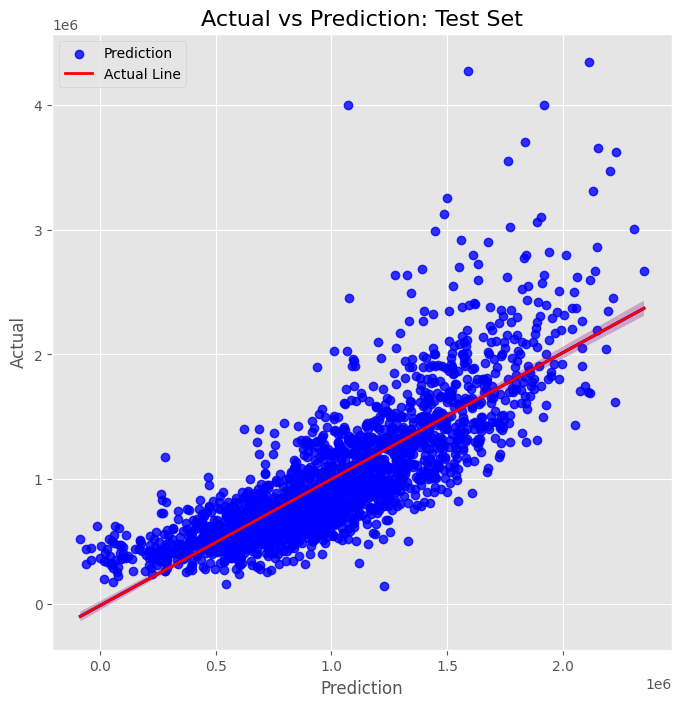

In [61]:
plt.figure(figsize=(8,8))

sns.regplot(y=y_test, x=y_pred, color='blue', label='Prediction')
sns.regplot(y=y_test, x=y_pred, line_kws = {'linewidth': 2}, scatter=False, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Test Set', fontsize=16)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.legend()
plt.show()

In [62]:
evaluation_df = pd.DataFrame({
    'actual value': y_test.reset_index(drop=True),
    'predicted value': y_pred
})

In [63]:
def segmentation(x):
    if x <= 250000:
        return '<250K'
    elif x <= 500000:
        return '250K-500K'
    elif x <= 750000:
        return '500K-750K'
    elif x <= 1000000:
        return '750K-1000K'
    elif x <= 1250000:
        return '1000K-1250K'
    elif x <= 1500000:
        return '1250K-1500K'
    elif x <= 1750000:
        return '1500K-1750K'
    elif x <= 2000000:
        return '1750K-2000K'
    else:
        return '>2000K'

evaluation_df['group'] = evaluation_df['predicted value'].apply(segmentation)

In [64]:
label = ['<250K', '250K-500K', '500K-750K', '750K-1000K', '1000K-1250K',
         '1250K-1500K', '1500K-1750K', '1750K-2000K',  '>2000K']

In [65]:
score = []
for group in label:
    data = evaluation_df[evaluation_df['group']==group]
    rmse = root_mean_squared_error(data['actual value'], data['predicted value'])
    score.append(rmse)

rmse_df = pd.DataFrame({
    'group': label,
    'rmse': score
})

rmse_df

,group,rmse
0,<250K,314784.110844
1,250K-500K,200444.539386
2,500K-750K,171537.269281
3,750K-1000K,222454.351847
4,1000K-1250K,331136.901405
5,1250K-1500K,375625.416442
6,1500K-1750K,454278.966357
7,1750K-2000K,560367.915564
8,>2000K,750736.688140


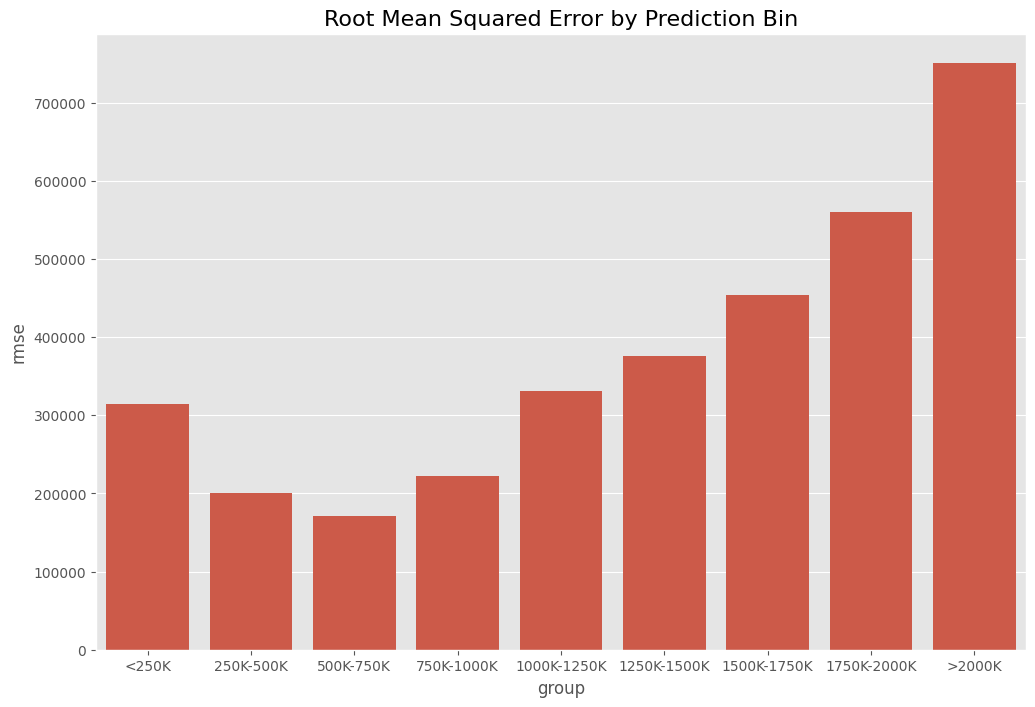

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(data=rmse_df, x='group', y='rmse')
plt.title('Root Mean Squared Error by Prediction Bin', size=16)
plt.show()

It can be seen that the RMSE is higher at larger predicted values.

#### `Model Limitations:`

The model is only valid for the following inputs:

- **Rooms**: between 1 and 4
- **Distance**: between 0 and 23.3
- **Bedroom2**: between 1 and 4
- **Bathroom**: between 0 and 3
- **Car**: between 0 and 3
- **Landsize**: between 0 and 1357
- **Building**: between 0 and 270
- **YearBuilt**: between 1893 and 2018

### **Conclusion**

**overall performance**

* R² = 0.64, meaning the model explains ~64% of the variance in house prices. This indicates relatively moderate relationship between predictors and price. 36% variations remains unexplained.

**Error prediction and RMSE across price ranges**
* Overall RMSE ≈ 319K AUD, which is large compared to typical house prices.
* RMSE is lowest for mid-range houses (250K–750K AUD, ~170K–200K).
* Errors increase drastically for extreme high-value homes (>2M AUD, ~750K).



### **Recommendation**

**Handle skewed target variable (Price)**

* Apply a log transformation on house prices before modeling.
This can reduce the impact of extreme luxury homes and stabilize variance.

**Address outliers**

* High-priced homes (>2M AUD) inflate RMSE.

* Consider winsorizing or capping extreme values, or build a separate model for luxury properties.

**Experiment with non-linear models**

* Tree-based models (Random Forest, Gradient Boosting, XGBoost) can capture complex relationships better than linear regression.Especially useful since the error increases with higher prices (non-linear effect).